<a href="https://colab.research.google.com/github/ram130849/Deep_Learning_Systems_Assignments/blob/main/TensorFlow/Sushant/Deep_Learning_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DLS Assignment - 1

### This assignment was discussed with Tejasram Ramesh and Ramki Ramamurthy.

### For this assignment I referred the following resources:
  #### 1) Deep Learning with Python - by Francois Cholet
  #### 2) https://stackoverflow.com/questions/44747343/keras-input-explanation-input-shape-units-batch-size-dim-etc
  #### 3) https://towardsdatascience.com/principal-component-analysis-network-in-tensorflow-with-interactive-code-7be543047704
  #### 4) https://stackoverflow.com/questions/71500106/how-to-implement-t-sne-in-tensorflow
  #### 5) https://stackoverflow.com/questions/63738681/what-layers-are-affected-by-dropout-layer-in-tensorflow
  #### 6) https://www.tutorialspoint.com/keras/keras_dropout_layers.htm
  #### 7) https://www.tutorialspoint.com/keras/keras_dropout_layers.htm

In [ ]:
timeit

<module 'timeit' from '/usr/lib/python3.7/timeit.py'>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import timeit
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten
from keras.models import Model
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))


Found GPU at: /device:GPU:0


In [3]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
0.5780052589998377
GPU (s):
0.04152539999995497
GPU speedup over CPU: 13x


In [4]:
mnist = tf.keras.datasets.mnist

In [5]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [6]:
#Lets look at the training data
print("Training Images Shape: ",train_images.shape)
print("Training Labels: ",train_labels)

#Lets look at the testing data
print("Testing Images Shape: ",test_images.shape)
print("Testing Labels: ",test_labels)

Training Images Shape:  (60000, 28, 28)
Training Labels:  [5 0 4 ... 5 6 8]
Testing Images Shape:  (10000, 28, 28)
Testing Labels:  [7 2 1 ... 4 5 6]


In [32]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(1024, activation='relu', name='first_layer'),
    layers.Dense(1024, activation='relu', name='second_layer'),
    layers.Dense(1024, activation='relu', name='third_layer'),
    layers.Dense(1024, activation='relu', name='fourth_layer'),
    layers.Dense(1024, activation='relu', name="fifth_layser"),
    layers.Dense(10, activation='softmax')
])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 first_layer (Dense)         (None, 1024)              803840    
                                                                 
 second_layer (Dense)        (None, 1024)              1049600   
                                                                 
 third_layer (Dense)         (None, 1024)              1049600   
                                                                 
 fourth_layer (Dense)        (None, 1024)              1049600   
                                                                 
 fifth_layser (Dense)        (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 10)               

In [33]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)

In [34]:
model.fit(train_images , train_labels ,epochs = 30, batch_size = 256)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


235/235 [==============================] - 1s 3ms/step - loss: 3.0112 - sparse_categorical_accuracy: 0.8789
Epoch 2/30
235/235 [==============================] - 1s 3ms/step - loss: 0.1084 - sparse_categorical_accuracy: 0.9668
Epoch 3/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0723 - sparse_categorical_accuracy: 0.9773
Epoch 4/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0567 - sparse_categorical_accuracy: 0.9819
Epoch 5/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0476 - sparse_categorical_accuracy: 0.9845
Epoch 6/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0474 - sparse_categorical_accuracy: 0.9846
Epoch 7/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0375 - sparse_categorical_accuracy: 0.9883
Epoch 8/30
235/235 [==============================] - 1s 3ms/step - loss: 0.0314 - sparse_categorical_accuracy: 0.9899
Epoch 9/30
235/235 [==============================] - 1s 3m

In [35]:
evaluation = model.evaluate(test_images , test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1317 - sparse_categorical_accuracy: 0.9761


In [36]:
evaluation

[0.1316853016614914, 0.9761000275611877]

# Problem 1 Part 3

In [37]:
prediction = model.predict(test_images)

In [38]:
prediction.shape

(10000, 10)

In [39]:
prediction[:3].argmax()

7

In [40]:
prediction[0:10]

array([[1.64228310e-20, 4.09758033e-15, 1.18310335e-14, 1.01542952e-16,
        1.16905666e-14, 6.05879555e-20, 2.16718009e-21, 1.00000000e+00,
        4.42325268e-19, 1.20349498e-16],
       [1.25149525e-14, 8.26862890e-15, 1.00000000e+00, 1.65864289e-09,
        2.01239321e-13, 1.25227586e-18, 1.02040429e-15, 1.49244137e-08,
        7.73675489e-15, 1.76881880e-16],
       [1.29345277e-14, 1.00000000e+00, 1.73389067e-14, 4.81769767e-15,
        3.67584550e-14, 1.62240869e-18, 9.71889344e-13, 2.39395380e-14,
        7.07345356e-14, 1.83630644e-14],
       [1.00000000e+00, 6.43365700e-20, 7.49154394e-15, 1.30675584e-15,
        2.39703729e-22, 1.09435368e-23, 8.24720405e-16, 4.35824067e-23,
        6.55529830e-19, 9.34989709e-18],
       [1.03621221e-06, 1.77048946e-07, 1.71880743e-06, 1.54028533e-06,
        9.98639166e-01, 6.00331077e-07, 4.07438085e-04, 2.76260944e-05,
        3.63445974e-06, 9.16940393e-04],
       [3.74288241e-20, 1.00000000e+00, 1.67393326e-20, 2.53144054e-20,
   

In [41]:
predictions_1000 = prediction[:1000]

[701  28 194  55 763 215 750 742 932 721]
[920  46 889 204 342 107 168 345 348 350]
[ 35 945 891 892 418 728 396 633 477 452]
[887 493 923 925 927 648 657 669 933  87]
[622 910 163 160 159 916 770 399 405 765]
[319 638 751 367 785 364 240 812 356 955]
[499 534 568 942 943 566 559 729 732 737]
[  0 853 263 262 255 254 243 229 223 822]
[876 401  84 232 527 226 709 864 961 181]
[999 209 954 599 634 662 678 706 733 758]


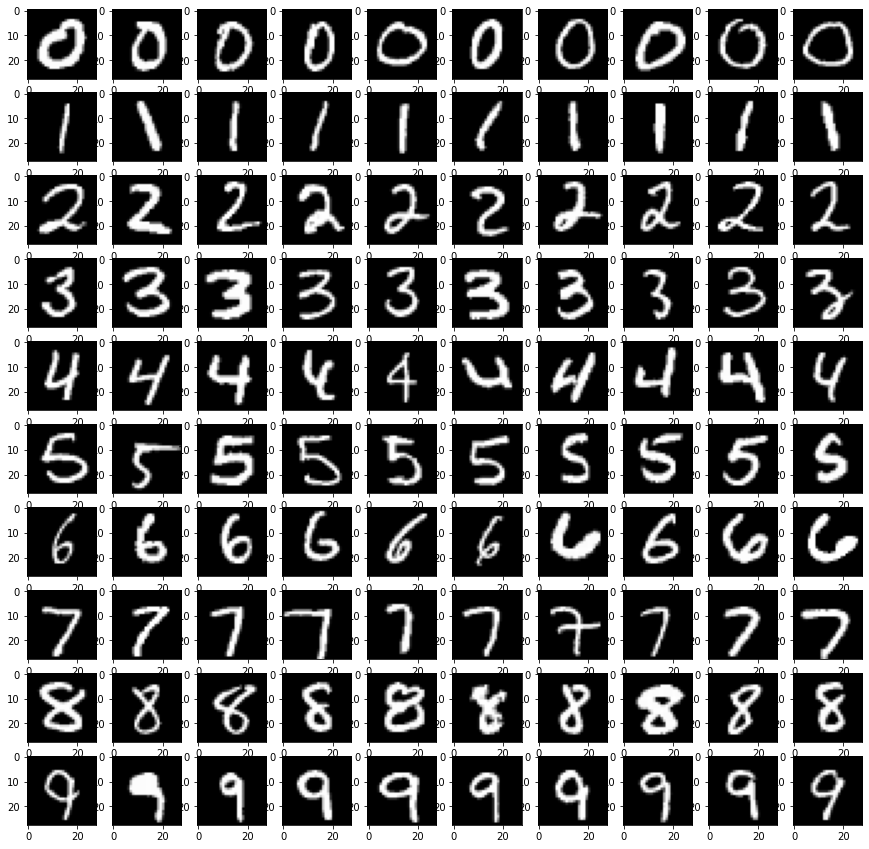

In [42]:
fig, axs = plt.subplots(10, 10, figsize=(15,15))
for i in range(0,10):
  image_pred = np.argsort(predictions_1000[:,i])[::-1][:10]
  print(image_pred)
  for j in range(10):
    axs[i,j].imshow(test_images[image_pred[j]], cmap=plt.get_cmap('gray'))
plt.show()

# Problem 1 Part 4

In [43]:
layer_second_last = model.layers[-2].output

In [44]:
layer_second_last.shape

TensorShape([None, 1024])

In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 first_layer (Dense)         (None, 1024)              803840    
                                                                 
 second_layer (Dense)        (None, 1024)              1049600   
                                                                 
 third_layer (Dense)         (None, 1024)              1049600   
                                                                 
 fourth_layer (Dense)        (None, 1024)              1049600   
                                                                 
 fifth_layser (Dense)        (None, 1024)              1049600   
                                                                 
 dense_5 (Dense)             (None, 10)               

In [46]:
feature_extractor = keras.Model(
    inputs=model.inputs,
    outputs=model.get_layer(name="fifth_layser").output,
)

# features is output of the model till second last layer
features = feature_extractor(test_images[:10000])

In [47]:
pred_2_last = np.array(features)

In [48]:
np_features = tf.nn.softmax(pred_2_last[np.random.choice(a=range(10000),size=1000,replace=False),:][:,np.random.choice(a=range(1024),size=10,replace=False)]).numpy().argmax(axis=1)


In [49]:
np_features

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 4, 0, 0, 0, 3, 0, 4, 3,
       0, 3, 3, 3, 3, 0, 0, 3, 4, 3, 0, 4, 0, 3, 0, 3, 0, 0, 3, 0, 3, 3,
       0, 0, 0, 3, 3, 3, 0, 0, 5, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 3,
       3, 0, 3, 3, 4, 3, 0, 3, 0, 0, 3, 0, 0, 0, 4, 3, 0, 0, 0, 0, 3, 0,
       0, 0, 3, 3, 0, 3, 3, 0, 3, 0, 4, 3, 3, 0, 4, 3, 3, 3, 0, 0, 3, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 3, 0,
       0, 0, 0, 3, 3, 0, 3, 3, 0, 4, 3, 0, 3, 3, 3, 3, 0, 0, 3, 3, 4, 4,
       3, 3, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 4, 0, 8, 0, 0, 0, 0, 0, 3, 0,
       3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 0, 3, 4, 3, 3, 0, 3,
       0, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0,
       0, 4, 0, 0, 3, 3, 4, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 4, 3, 3, 3, 4,
       0, 3, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 0, 3, 3, 0, 0, 4, 4, 3, 5, 3,
       3, 0, 0, 4, 3, 0, 3, 4, 0, 0, 3, 3, 0, 3, 4,

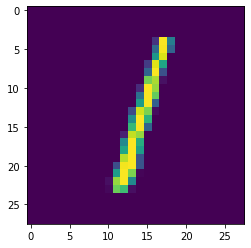

In [50]:
plt.imshow(test_images[2])

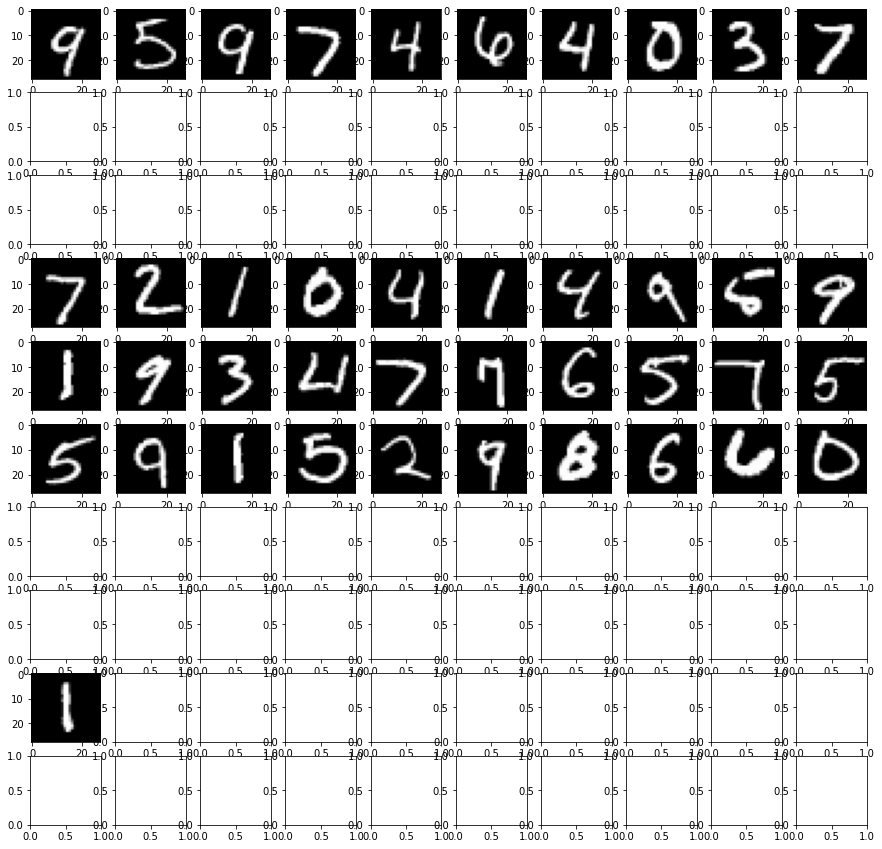

In [51]:
fig, axs = plt.subplots(10, 10, figsize=(15,15))
for i in range(10):  
    result = np.where(np_features==i)[0][:10]
    for j in range(10):
      try:
          axs[i,j].imshow(test_images[result[j]], cmap=plt.get_cmap('gray'))
      except:
          continue
plt.show()

Here we rabndomly selected ten nodes out of 1024. Since we skipped feature mapping stepo we dont know exactly which feature is right. Hence we see wrong results

## Problem 1 Part 5 : PCA and t-SNE

In [52]:
layer1_model = Model(inputs=model.input, outputs=model.get_layer("first_layer").output)
layer1_output = layer1_model.predict(test_images[:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

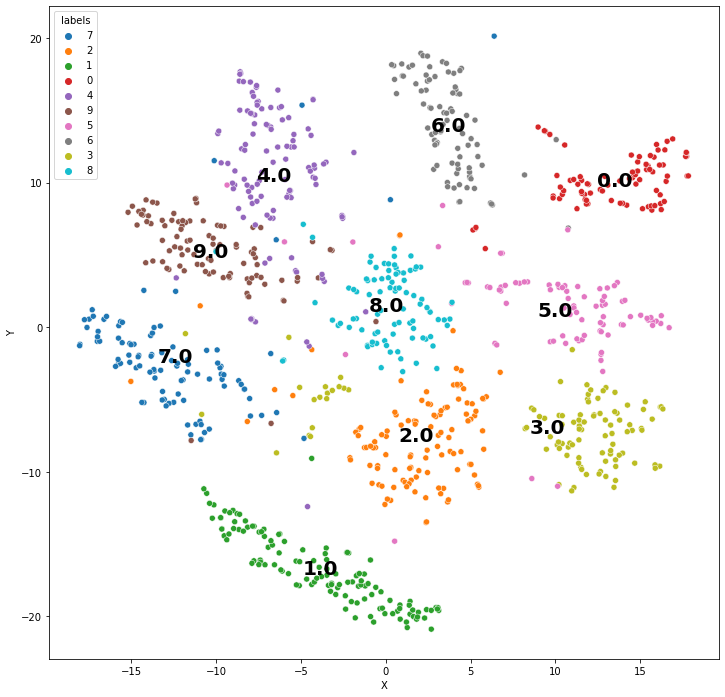

In [62]:
tsne = TSNE(n_components=2, n_iter=300)
tsne = tsne.fit_transform(layer1_output) 
tsne_df = pd.DataFrame(tsne,columns=['X','Y'])
tsne_df["labels"] = test_labels[:1000]
tsne_df["labels"] = tsne_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroid = tsne_df.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centroid["labels"] = centroid["labels"].apply(lambda x:int(x))
centroid = centroid.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=tsne_df)
values = centroid.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center',size=20, weight='bold',color='k')
plt.plot(figsize=(20,20))


[]

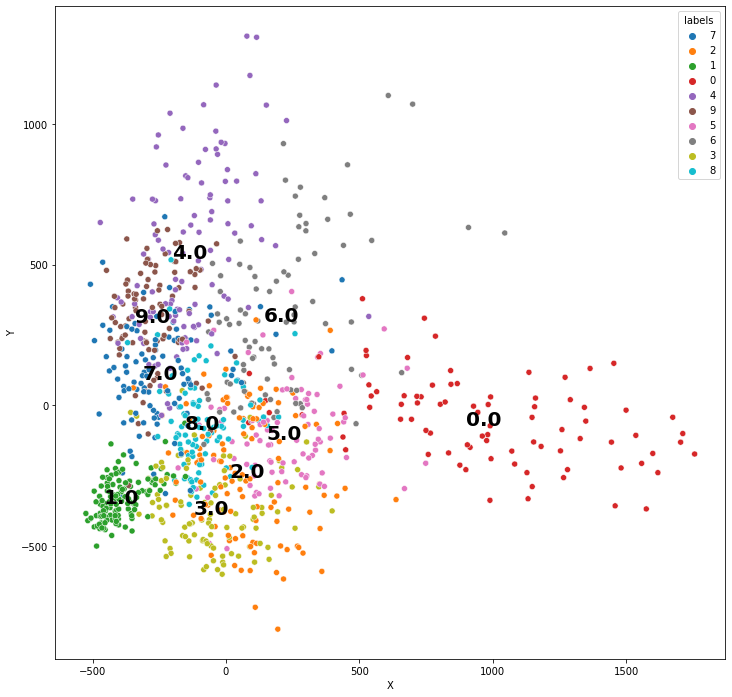

In [63]:
pca = PCA(n_components=2)
pca = pca.fit_transform(layer1_output) # Fit the model on this output

pca_df = pd.DataFrame(pca,columns=["X","Y"])
pca_df["labels"] = test_labels[:1000]
pca_df["labels"] = pca_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroids = pca_df.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centroids["labels"] = centroids["labels"].apply(lambda x:int(x))
centroids.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=pca_df)
values = centroids.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center', size=20, weight='bold', color='k')
plt.plot()

### Second Layer

In [68]:
layer2_model = Model(inputs=model.input, outputs=model.get_layer("second_layer").output)
layer2_output = layer2_model.predict(test_images[:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

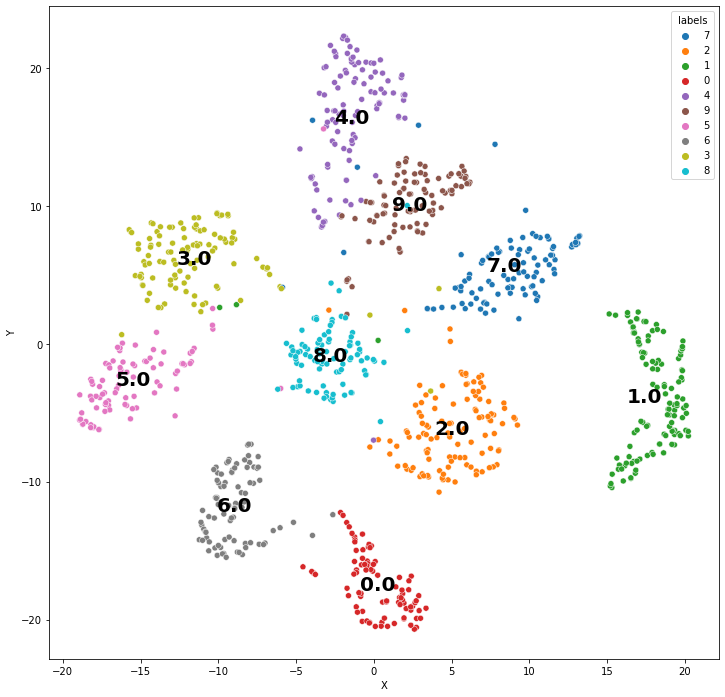

In [69]:
tsne = TSNE(n_components=2, n_iter=300)
tsne = tsne.fit_transform(layer2_output) 
tsne_df = pd.DataFrame(tsne,columns=['X','Y'])
tsne_df["labels"] = test_labels[:1000]
tsne_df["labels"] = tsne_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroid = tsne_df.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centroid["labels"] = centroid["labels"].apply(lambda x:int(x))
centroid = centroid.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=tsne_df)
values = centroid.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center',size=20, weight='bold',color='k')
plt.plot(figsize=(20,20))

[]

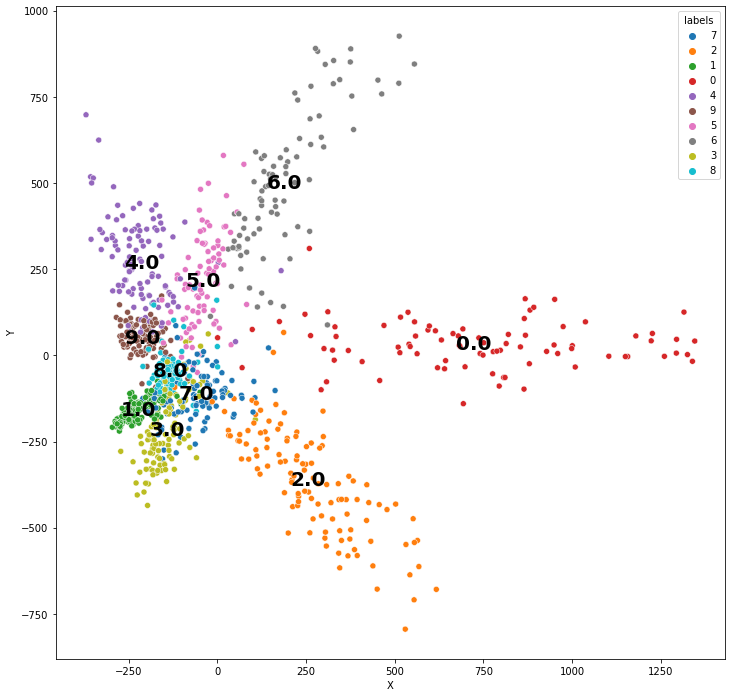

In [70]:
pca = PCA(n_components=2)
pca = pca.fit_transform(layer2_output) # Fit the model on this output

pca_df = pd.DataFrame(pca,columns=["X","Y"])
pca_df["labels"] = test_labels[:1000]
pca_df["labels"] = pca_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroids = pca_df.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centroids["labels"] = centroids["labels"].apply(lambda x:int(x))
centroids.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=pca_df)
values = centroids.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center', size=20, weight='bold', color='k')
plt.plot()

### Third Layer

In [72]:
layer3_model = Model(inputs=model.input, outputs=model.get_layer("third_layer").output)
layer3_output = layer3_model.predict(test_images[:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

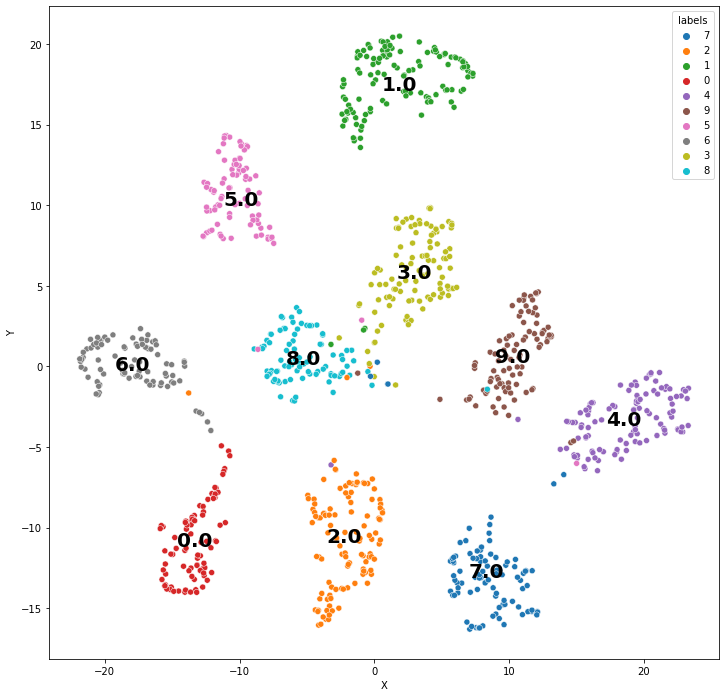

In [73]:
tsne = TSNE(n_components=2, n_iter=300)
tsne = tsne.fit_transform(layer3_output) 
tsne_df = pd.DataFrame(tsne,columns=['X','Y'])
tsne_df["labels"] = test_labels[:1000]
tsne_df["labels"] = tsne_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroid = tsne_df.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centroid["labels"] = centroid["labels"].apply(lambda x:int(x))
centroid = centroid.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=tsne_df)
values = centroid.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center',size=20, weight='bold',color='k')
plt.plot(figsize=(20,20))

[]

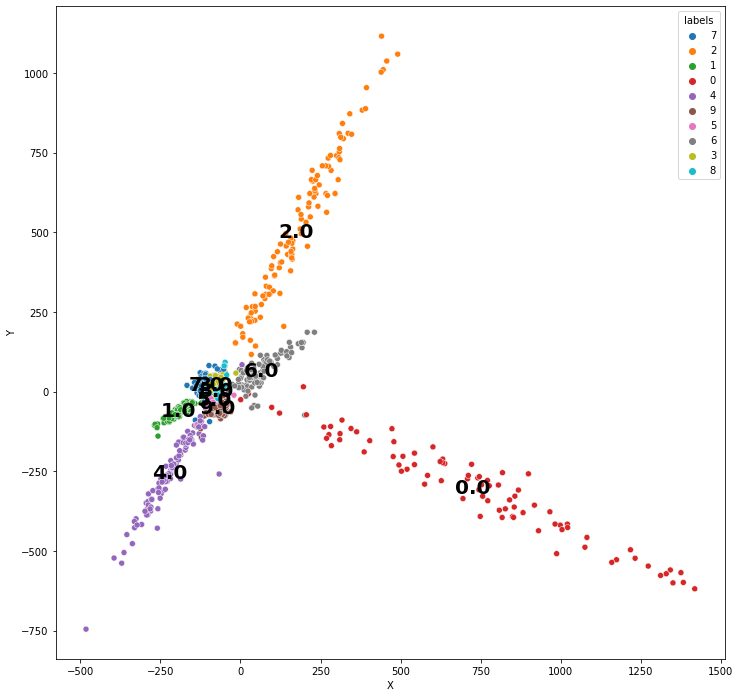

In [74]:
pca = PCA(n_components=2)
pca = pca.fit_transform(layer3_output) # Fit the model on this output

pca_df = pd.DataFrame(pca,columns=["X","Y"])
pca_df["labels"] = test_labels[:1000]
pca_df["labels"] = pca_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroids = pca_df.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centroids["labels"] = centroids["labels"].apply(lambda x:int(x))
centroids.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=pca_df)
values = centroids.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center', size=20, weight='bold', color='k')
plt.plot()

### Fourth Layer

In [75]:
layer4_model = Model(inputs=model.input, outputs=model.get_layer("fourth_layer").output)
layer4_output = layer4_model.predict(test_images[:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

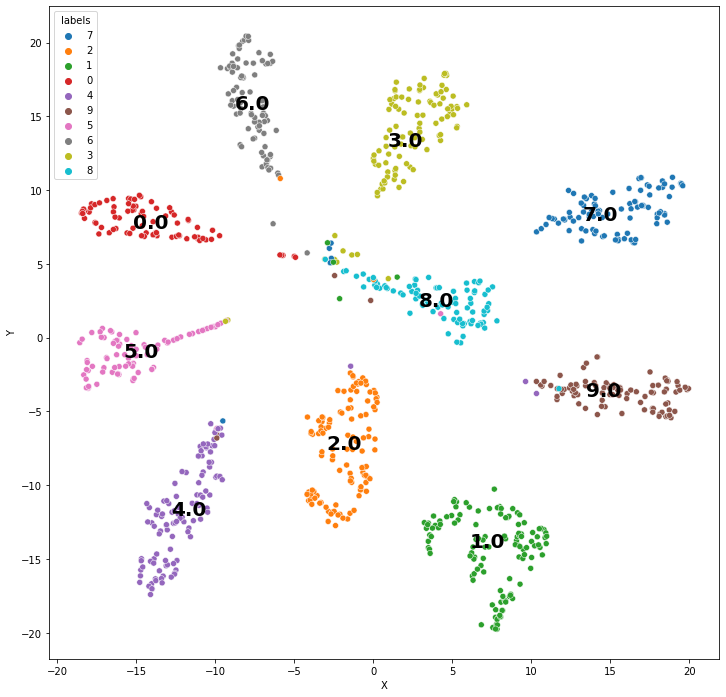

In [76]:
tsne = TSNE(n_components=2, n_iter=300)
tsne = tsne.fit_transform(layer4_output) 
tsne_df = pd.DataFrame(tsne,columns=['X','Y'])
tsne_df["labels"] = test_labels[:1000]
tsne_df["labels"] = tsne_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroid = tsne_df.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centroid["labels"] = centroid["labels"].apply(lambda x:int(x))
centroid = centroid.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=tsne_df)
values = centroid.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center',size=20, weight='bold',color='k')
plt.plot(figsize=(20,20))

[]

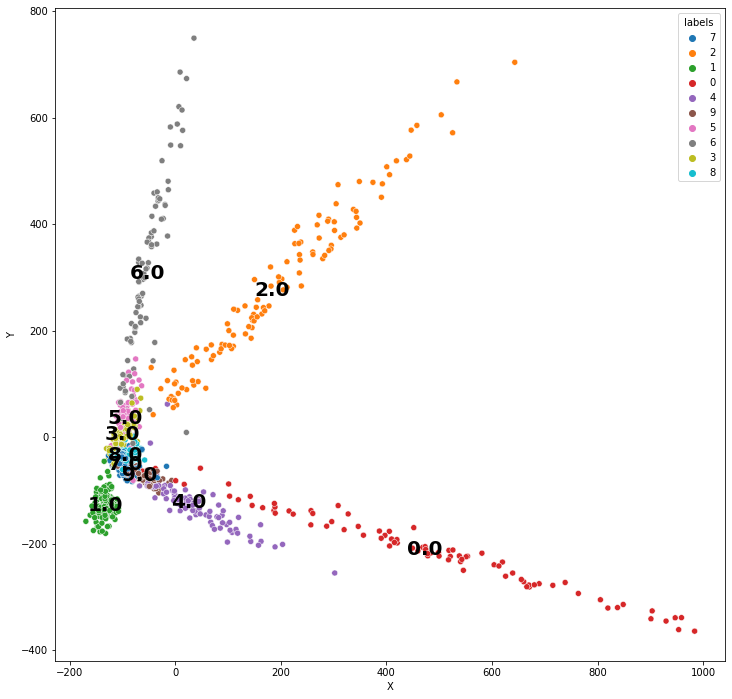

In [77]:
pca = PCA(n_components=2)
pca = pca.fit_transform(layer4_output) # Fit the model on this output

pca_df = pd.DataFrame(pca,columns=["X","Y"])
pca_df["labels"] = test_labels[:1000]
pca_df["labels"] = pca_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroids = pca_df.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centroids["labels"] = centroids["labels"].apply(lambda x:int(x))
centroids.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=pca_df)
values = centroids.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center', size=20, weight='bold', color='k')
plt.plot()

### Fifth Layer

In [79]:
layer5_model = Model(inputs=model.input, outputs=model.get_layer("fifth_layser").output)
layer5_output = layer5_model.predict(test_images[:1000])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[]

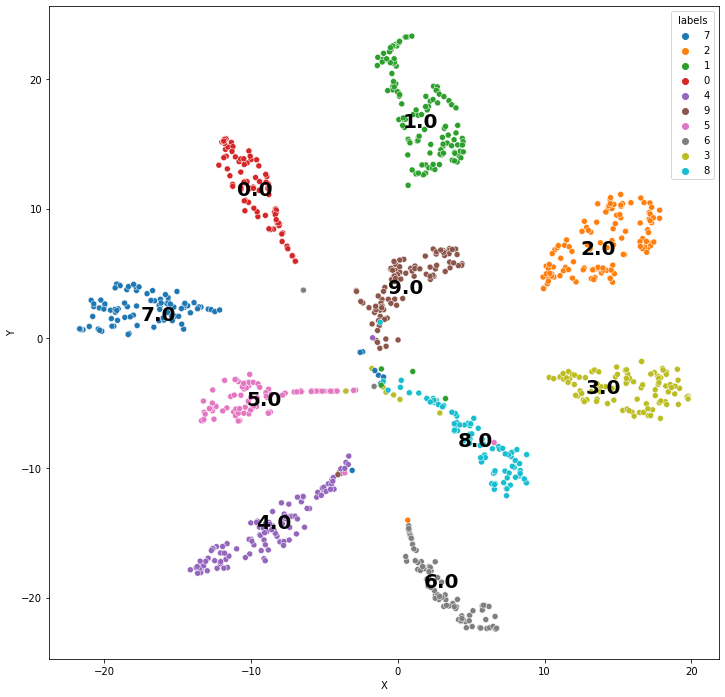

In [80]:
tsne = TSNE(n_components=2, n_iter=300)
tsne = tsne.fit_transform(layer5_output) 
tsne_df = pd.DataFrame(tsne,columns=['X','Y'])
tsne_df["labels"] = test_labels[:1000]
tsne_df["labels"] = tsne_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroid = tsne_df.groupby("labels").agg({'X':"mean",'Y':"mean"}).reset_index()
centroid["labels"] = centroid["labels"].apply(lambda x:int(x))
centroid = centroid.sort_values(by="labels",ascending=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x='X',y='Y',hue="labels",data=tsne_df)
values = centroid.values
for i in range(10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center',size=20, weight='bold',color='k')
plt.plot(figsize=(20,20))

[]

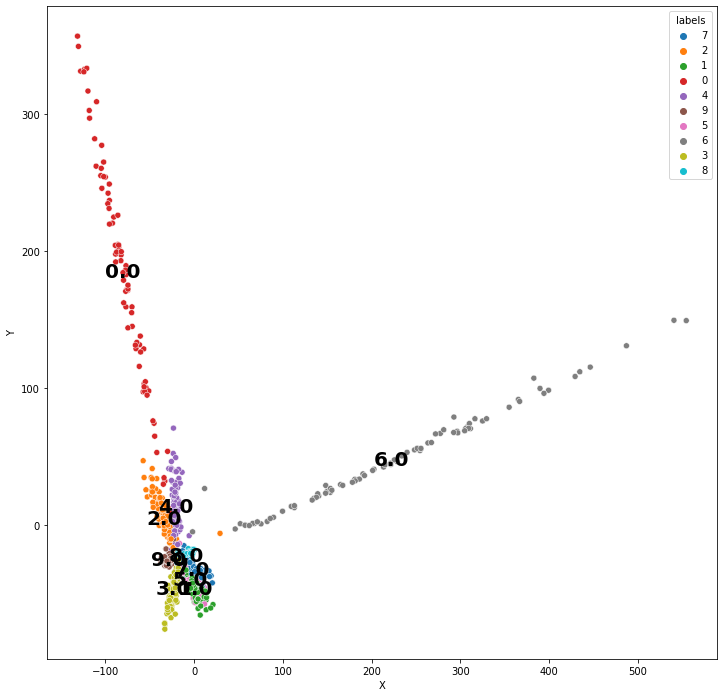

In [83]:
pca = PCA(n_components=2)
pca = pca.fit_transform(layer5_output) # Fit the model on this output

pca_df = pd.DataFrame(pca,columns=["X","Y"])
pca_df["labels"] = test_labels[:1000]
pca_df["labels"] = pca_df["labels"].apply(lambda x:str(x))

#Getting centroid of each label
centroids = pca_df.groupby("labels").agg({"X":"mean","Y":"mean"}).reset_index()
centroids["labels"] = centroids["labels"].apply(lambda x:int(x))
centroids.sort_values(by="labels",ascending=True,inplace=True)

plt.rcParams['figure.figsize'] = (12,12)
plotting = sns.scatterplot(x="X",y="Y",hue="labels",data=pca_df)
values = centroids.values
for i in range(0,10):
  plt.text(x=values[i,1],y=values[i,2],s=str(values[i,0]), horizontalalignment='center', verticalalignment='center', size=20, weight='bold', color='k')
plt.plot()

We can see that in the lower layers the data is undergoing some sort of pre processing due to which the data is becoming more seperable as it passes through more Dense layers. 

We can also see that TSNE is working better than PCA on non linear data. It makes sense as our data is an image and some non linearity is expected from an image.

# Problem 2

In [85]:
(train_images, train_labels) , (test_images, test_labels) = mnist.load_data()

In [86]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')


train_images = train_images/255
test_images = test_images/255

In [87]:
train_images.shape

(60000, 28, 28)

In [88]:
test_images.shape

(10000, 28, 28)

In [89]:
train_images = train_images.reshape(len(train_images), 784)
test_images = test_images.reshape(len(test_images), 784)


In [90]:
train_images.shape

(60000, 784)

In [91]:
test_images.shape

(10000, 784)

In [92]:
# One-Hot Encoding
#train_labels = keras.utils.np_utils.to_categorical(y_train, 10)
#test_labels = keras.utils.np_utils.to_categorical(y_test, 10)
train_cat = to_categorical(train_labels, num_classes=10)
test_cat = to_categorical(test_labels, num_classes=10)

In [93]:
optimizer_sgd = keras.optimizers.SGD(learning_rate=0.01)
optimizer_adam = keras.optimizers.Adam()

In [94]:
xavier_normal = keras.initializers.GlorotNormal()
normal_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.01)
he_init = keras.initializers.HeNormal()

## Model 1

In [119]:
model_1 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=10, activation="softmax", kernel_initializer=normal_init)
  ])

In [120]:
model_1.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [121]:
model1_history = model_1.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 2.3038 - acc: 0.1078 - val_loss: 2.3037 - val_acc: 0.1135
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3037 - acc: 0.1082 - val_loss: 2.3041 - val_acc: 0.1028
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3037 - acc: 0.1062 - val_loss: 2.3035 - val_acc: 0.1135
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3037 - acc: 0.1068 - val_loss: 2.3030 - val_acc: 0.1135
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3037 - acc: 0.1085 - val_loss: 2.3036 - val_acc: 0.1028
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3038 - acc: 0.1064 - val_loss: 2.3024 - val_acc: 0.1135
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3040 - acc: 0.1069 - val_loss: 2.3021 - val_acc: 0.1032
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model 2

In [122]:
model_2 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax", kernel_initializer=xavier_normal)
  ])

In [123]:
model_2.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [124]:
model2_history = model_2.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 2.3066 - acc: 0.1066 - val_loss: 2.3023 - val_acc: 0.1010
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3038 - acc: 0.1085 - val_loss: 2.3100 - val_acc: 0.1028
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3040 - acc: 0.1063 - val_loss: 2.3055 - val_acc: 0.1135
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3038 - acc: 0.1062 - val_loss: 2.3053 - val_acc: 0.1010
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3039 - acc: 0.1060 - val_loss: 2.3039 - val_acc: 0.1135
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3041 - acc: 0.1063 - val_loss: 2.3031 - val_acc: 0.1135
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 2.3038 - acc: 0.1077 - val_loss: 2.3047 - val_acc: 0.1010
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model 3

In [132]:
model_3 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [133]:
model_3.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [134]:
model3_history = model_3.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 1.8229 - acc: 0.5811 - val_loss: 0.7010 - val_acc: 0.8416
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.4664 - acc: 0.8733 - val_loss: 0.3520 - val_acc: 0.8960
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3269 - acc: 0.9060 - val_loss: 0.2845 - val_acc: 0.9171
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2784 - acc: 0.9198 - val_loss: 0.2453 - val_acc: 0.9283
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2442 - acc: 0.9291 - val_loss: 0.2198 - val_acc: 0.9363
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.2173 - acc: 0.9370 - val_loss: 0.1960 - val_acc: 0.9433
Epoch 7/200
469/469 [==============================] - 2s 5ms/step - loss: 0.1960 - acc: 0.9436 - val_loss: 0.1892 - val_acc: 0.9456
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model 4

In [ ]:
model_4 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [ ]:
model_4.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [67]:
model4_history = model_4.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 4s 8ms/step - loss: 1.3696 - acc: 0.6662 - val_loss: 0.5253 - val_acc: 0.8481
Epoch 2/200
469/469 [==============================] - 3s 7ms/step - loss: 0.4007 - acc: 0.8853 - val_loss: 0.3143 - val_acc: 0.9097
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 0.2986 - acc: 0.9131 - val_loss: 0.2680 - val_acc: 0.9207
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2527 - acc: 0.9261 - val_loss: 0.2391 - val_acc: 0.9281
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2225 - acc: 0.9350 - val_loss: 0.2119 - val_acc: 0.9382
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1988 - acc: 0.9423 - val_loss: 0.1865 - val_acc: 0.9445
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1795 - acc: 0.9477 - val_loss: 0.1720 - val_acc: 0.9497
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model 5

In [ ]:
model_5 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu' kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu' kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu' kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu' kernel_initializer=he_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [ ]:
model_5.compile(optimizer=optimizer_sgd, loss= 'categorical_crossentropy', metrics=["acc"])

In [68]:
model5_history = model_5.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 2s 5ms/step - loss: 1.2717 - acc: 0.6938 - val_loss: 0.4853 - val_acc: 0.8553
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.3854 - acc: 0.8903 - val_loss: 0.3337 - val_acc: 0.8979
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2934 - acc: 0.9146 - val_loss: 0.2566 - val_acc: 0.9249
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2491 - acc: 0.9278 - val_loss: 0.2244 - val_acc: 0.9326
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2188 - acc: 0.9364 - val_loss: 0.2041 - val_acc: 0.9371
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1965 - acc: 0.9424 - val_loss: 0.1825 - val_acc: 0.9447
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1770 - acc: 0.9481 - val_loss: 0.1700 - val_acc: 0.9491
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


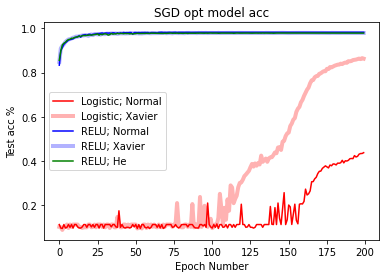

In [70]:
plt.plot(model1_history.history['val_acc'], color = 'red')
plt.plot(model2_history.history['val_acc'], color='red',linewidth=4.0,alpha=0.3)
plt.plot(model3_history.history['val_acc'], color = 'blue')
plt.plot(model4_history.history['val_acc'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(model5_history.history['val_acc'],color='green')
plt.title('SGD opt model acc')
plt.ylabel('Test acc %')
plt.xlabel('Epoch Number')
plt.legend(['Logistic; Normal', 'Logistic; Xavier', 'RELU; Normal', 'RELU; Xavier','RELU; He'], loc='bottom right')
plt.show()

# Models with Adam Optimizer

In [ ]:
model6 = define_model(act_fxn= 'sigmoid',init = normal_initializer)
model7 = define_model(act_fxn= 'sigmoid',init = xavier_ini_normal)
model8 = define_model(act_fxn= 'relu',init = normal_initializer)
model9 = define_model(act_fxn= 'relu',init = xavier_ini_normal)
model10 = define_model(act_fxn= 'relu',init = he_initializer)

In [71]:
model_adam_1 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=normal_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [72]:
model_adam_1.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [ ]:
model_adam_1_history = model_adam_1.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 1.7446 - acc: 0.2815 - val_loss: 1.2416 - val_acc: 0.4910
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.7435 - acc: 0.7335 - val_loss: 0.4227 - val_acc: 0.8791
Epoch 3/200
469/469 [==============================] - 3s 6ms/step - loss: 0.3261 - acc: 0.9080 - val_loss: 0.2838 - val_acc: 0.9218
Epoch 4/200
469/469 [==============================] - 4s 9ms/step - loss: 0.2405 - acc: 0.9338 - val_loss: 0.2265 - val_acc: 0.9385
Epoch 5/200
469/469 [==============================] - 3s 5ms/step - loss: 0.1892 - acc: 0.9481 - val_loss: 0.1899 - val_acc: 0.9479
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1560 - acc: 0.9566 - val_loss: 0.1656 - val_acc: 0.9550
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1284 - acc: 0.9645 - val_loss: 0.1354 - val_acc: 0.9609
Epoch 8/200
469/469 [==============================] - 2s 5ms/step - 

## Model Adam 2

In [ ]:
model_adam_2 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [ ]:
model_adam_2.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [76]:
model_adam_2_history = model_adam_2.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 1.0931 - acc: 0.6046 - val_loss: 0.2553 - val_acc: 0.9312
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1711 - acc: 0.9519 - val_loss: 0.1355 - val_acc: 0.9616
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.1083 - acc: 0.9693 - val_loss: 0.1149 - val_acc: 0.9680
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0787 - acc: 0.9777 - val_loss: 0.0978 - val_acc: 0.9726
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0625 - acc: 0.9820 - val_loss: 0.0866 - val_acc: 0.9761
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0489 - acc: 0.9853 - val_loss: 0.0951 - val_acc: 0.9748
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0417 - acc: 0.9876 - val_loss: 0.0930 - val_acc: 0.9746
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model Adam 3

In [79]:
model_adam_3 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=normal_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [80]:
model_adam_3.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [81]:
model_adam_3_history = model_adam_3.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.5897 - acc: 0.7903 - val_loss: 0.1658 - val_acc: 0.9537
Epoch 2/200
469/469 [==============================] - 3s 6ms/step - loss: 0.1210 - acc: 0.9654 - val_loss: 0.1090 - val_acc: 0.9682
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0776 - acc: 0.9768 - val_loss: 0.1044 - val_acc: 0.9690
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0554 - acc: 0.9835 - val_loss: 0.0946 - val_acc: 0.9736
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0437 - acc: 0.9862 - val_loss: 0.0997 - val_acc: 0.9749
Epoch 6/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0350 - acc: 0.9893 - val_loss: 0.0922 - val_acc: 0.9769
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0281 - acc: 0.9917 - val_loss: 0.0957 - val_acc: 0.9769
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model Adam 4

In [82]:
model_adam_4 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [83]:
model_adam_4.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [ ]:
model_adam_4_history = model_adam_4.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 3s 5ms/step - loss: 0.2559 - acc: 0.9228 - val_loss: 0.1102 - val_acc: 0.9686
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0894 - acc: 0.9739 - val_loss: 0.0883 - val_acc: 0.9744
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0588 - acc: 0.9820 - val_loss: 0.0918 - val_acc: 0.9761
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0431 - acc: 0.9873 - val_loss: 0.0894 - val_acc: 0.9765
Epoch 5/200
469/469 [==============================] - 2s 5ms/step - loss: 0.0357 - acc: 0.9890 - val_loss: 0.0844 - val_acc: 0.9793
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0305 - acc: 0.9909 - val_loss: 0.0790 - val_acc: 0.9807
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0230 - acc: 0.9929 - val_loss: 0.0735 - val_acc: 0.9812
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

## Model Adam 5

In [ ]:
model_adam_5 = keras.Sequential([
    keras.layers.Dense(units=512, input_shape=(784,), activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=512, activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [ ]:
model_adam_5.compile(optimizer=optimizer_adam, loss= 'categorical_crossentropy', metrics=["acc"])

In [ ]:
model_adam_5_history = model_adam_5.fit(train_images,train_cat,epochs=200,batch_size=128,verbose=True,validation_data=(test_images,test_cat))

Epoch 1/200
469/469 [==============================] - 2s 4ms/step - loss: 0.2458 - acc: 0.9265 - val_loss: 0.1145 - val_acc: 0.9676
Epoch 2/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0845 - acc: 0.9741 - val_loss: 0.0953 - val_acc: 0.9732
Epoch 3/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0582 - acc: 0.9821 - val_loss: 0.0755 - val_acc: 0.9782
Epoch 4/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0425 - acc: 0.9870 - val_loss: 0.0889 - val_acc: 0.9782
Epoch 5/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0319 - acc: 0.9901 - val_loss: 0.0926 - val_acc: 0.9762
Epoch 6/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0299 - acc: 0.9904 - val_loss: 0.0861 - val_acc: 0.9786
Epoch 7/200
469/469 [==============================] - 2s 4ms/step - loss: 0.0226 - acc: 0.9931 - val_loss: 0.1064 - val_acc: 0.9781
Epoch 8/200
469/469 [==============================] - 2s 4ms/step - 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


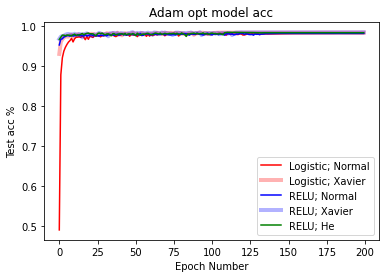

In [89]:
plt.plot(model_adam_1_history.history['val_acc'], color = 'red')
plt.plot(model_adam_2_history.history['val_acc'], color='red',linewidth=4.0,alpha=0.3)
plt.plot(model_adam_3_history.history['val_acc'], color = 'blue')
plt.plot(model_adam_4_history.history['val_acc'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(model_adam_5_history.history['val_acc'],color='green')
plt.title('Adam opt model acc')
plt.ylabel('Test acc %')
plt.xlabel('Epoch Number')
plt.legend(['Logistic; Normal', 'Logistic; Xavier', 'RELU; Normal', 'RELU; Xavier','RELU; He'], loc='bottom right')
plt.show()

# Problem 3

## Model 1

In [101]:
no_dropout_1 = keras.Sequential([
    keras.layers.Dense(units=1024, input_shape=(784,), activation='sigmoid', kernel_initializer=xavier_normal),
    keras.layers.Dense(units=1024, activation='sigmoid',  kernel_initializer=xavier_normal),
    keras.layers.Dense(units=1024, activation='sigmoid',  kernel_initializer=xavier_normal),
    keras.layers.Dense(units=1024, activation='sigmoid',  kernel_initializer=xavier_normal),
    keras.layers.Dense(units=1024, activation='sigmoid',  kernel_initializer=xavier_normal),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [102]:
no_dropout_1.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['acc'])

In [103]:
no_dropout_1_history = no_dropout_1.fit(train_images, train_cat, batch_size=128, epochs=500,verbose=True,validation_data=(test_images, test_cat))

Epoch 1/500
469/469 [==============================] - 2s 4ms/step - loss: 1.1957 - acc: 0.5477 - val_loss: 0.3188 - val_acc: 0.9062
Epoch 2/500
469/469 [==============================] - 2s 3ms/step - loss: 0.2634 - acc: 0.9224 - val_loss: 0.2060 - val_acc: 0.9354
Epoch 3/500
469/469 [==============================] - 2s 3ms/step - loss: 0.1721 - acc: 0.9481 - val_loss: 0.1627 - val_acc: 0.9528
Epoch 4/500
469/469 [==============================] - 2s 3ms/step - loss: 0.1345 - acc: 0.9611 - val_loss: 0.1299 - val_acc: 0.9621
Epoch 5/500
469/469 [==============================] - 2s 3ms/step - loss: 0.1083 - acc: 0.9678 - val_loss: 0.1214 - val_acc: 0.9668
Epoch 6/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0884 - acc: 0.9739 - val_loss: 0.1013 - val_acc: 0.9709
Epoch 7/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0724 - acc: 0.9784 - val_loss: 0.0953 - val_acc: 0.9718
Epoch 8/500
469/469 [==============================] - 2s 3ms/step - 

## Model 3

In [107]:
no_dropout_3 = keras.Sequential([
    keras.layers.Dense(units=1024, input_shape=(784,), activation='relu', kernel_initializer=he_init),
    keras.layers.Dense(units=1024, activation='relu',  kernel_initializer=he_init),
    keras.layers.Dense(units=1024, activation='relu',  kernel_initializer=he_init),
    keras.layers.Dense(units=1024, activation='relu',  kernel_initializer=he_init),
    keras.layers.Dense(units=1024, activation='relu',  kernel_initializer=he_init),
    keras.layers.Dense(units=10, activation="softmax")
  ])

In [108]:
no_dropout_3.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['acc'])

In [109]:
no_dropout_3_history = no_dropout_3.fit(train_images, train_cat, batch_size=128, epochs=500,verbose=True,validation_data=(test_images, test_cat))

Epoch 1/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2228 - acc: 0.9337 - val_loss: 0.1207 - val_acc: 0.9620
Epoch 2/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0923 - acc: 0.9734 - val_loss: 0.0947 - val_acc: 0.9733
Epoch 3/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0679 - acc: 0.9799 - val_loss: 0.0928 - val_acc: 0.9708
Epoch 4/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0529 - acc: 0.9844 - val_loss: 0.0968 - val_acc: 0.9743
Epoch 5/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0426 - acc: 0.9876 - val_loss: 0.1125 - val_acc: 0.9728
Epoch 6/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0381 - acc: 0.9890 - val_loss: 0.0877 - val_acc: 0.9796
Epoch 7/500
469/469 [==============================] - 2s 3ms/step - loss: 0.0300 - acc: 0.9916 - val_loss: 0.1068 - val_acc: 0.9760
Epoch 8/500
469/469 [==============================] - 2s 3ms/step - 

## Dropout Model 2

In [95]:
dropout_model2 = keras.models.Sequential([
  keras.layers.Dense(units=1024, input_shape=(784,)),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='sigmoid',kernel_initializer=xavier_normal),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(10,activation = 'softmax')
])

In [96]:
dropout_model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [97]:
dropout_model2_history = dropout_model2.fit(train_images, train_cat, batch_size=128, epochs=500,verbose=True,validation_data=(test_images, test_cat))

Epoch 1/500
469/469 [==============================] - 3s 4ms/step - loss: 0.8070 - acc: 0.7304 - val_loss: 0.2692 - val_acc: 0.9248
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2395 - acc: 0.9339 - val_loss: 0.1735 - val_acc: 0.9509
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1826 - acc: 0.9482 - val_loss: 0.1548 - val_acc: 0.9564
Epoch 4/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1563 - acc: 0.9561 - val_loss: 0.1481 - val_acc: 0.9592
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1357 - acc: 0.9608 - val_loss: 0.1372 - val_acc: 0.9621
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1249 - acc: 0.9644 - val_loss: 0.1389 - val_acc: 0.9610
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1148 - acc: 0.9671 - val_loss: 0.1227 - val_acc: 0.9671
Epoch 8/500
469/469 [==============================] - 2s 4ms/step - 

## Dropout Model 4

In [117]:
xavier_initializer = tf.keras.initializers.GlorotUniform()

In [124]:
dropout_model4 = keras.models.Sequential([
  Flatten(input_shape=(784,)),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dropout(0.5),
  keras.layers.Dense(1024,activation='relu',kernel_initializer=he_init),
  keras.layers.Dense(10,activation = 'softmax')
])

In [125]:
dropout_model4.compile(optimizer=optimizer_adam, loss='categorical_crossentropy', metrics=['acc'])

In [126]:
dropout_model4_history = dropout_model4.fit(train_images, train_cat, batch_size=128, epochs=500,verbose=True,validation_data=(test_images, test_cat))

Epoch 1/500
469/469 [==============================] - 3s 4ms/step - loss: 0.5862 - acc: 0.8268 - val_loss: 0.1687 - val_acc: 0.9556
Epoch 2/500
469/469 [==============================] - 2s 4ms/step - loss: 0.2319 - acc: 0.9397 - val_loss: 0.1286 - val_acc: 0.9640
Epoch 3/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1849 - acc: 0.9506 - val_loss: 0.1035 - val_acc: 0.9722
Epoch 4/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1588 - acc: 0.9581 - val_loss: 0.1080 - val_acc: 0.9723
Epoch 5/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1379 - acc: 0.9638 - val_loss: 0.0912 - val_acc: 0.9756
Epoch 6/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1306 - acc: 0.9655 - val_loss: 0.0899 - val_acc: 0.9768
Epoch 7/500
469/469 [==============================] - 2s 4ms/step - loss: 0.1175 - acc: 0.9685 - val_loss: 0.0932 - val_acc: 0.9761
Epoch 8/500
469/469 [==============================] - 2s 4ms/step - 

## Plotting for Problem 3

### 1024 X RELU

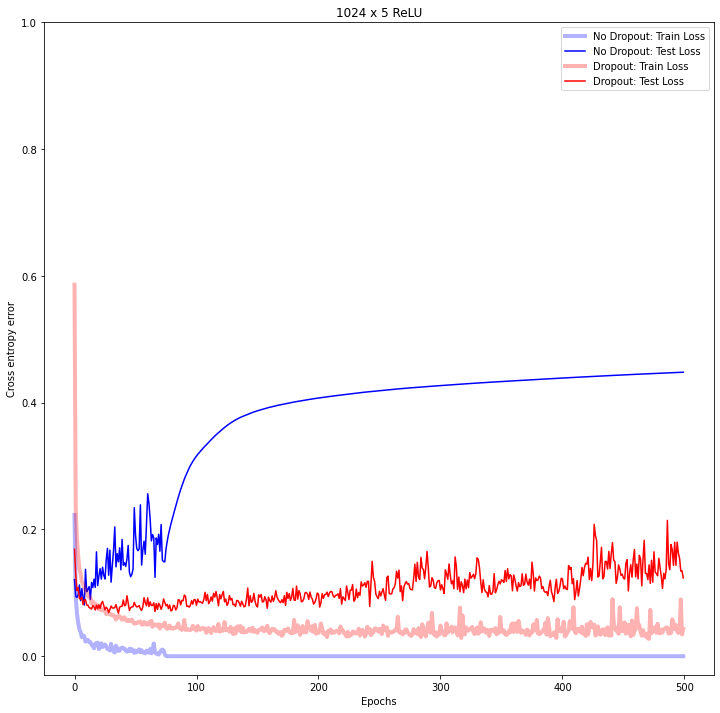

In [127]:
plt.plot(no_dropout_3_history.history['loss'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(no_dropout_3_history.history['val_loss'], color = 'blue')
plt.plot(dropout_model4_history.history['loss'],color='red',linewidth=4.0,alpha=0.3)
plt.plot(dropout_model4_history.history['val_loss'], color = 'red')

plt.legend(['No Dropout: Train Loss','No Dropout: Test Loss','Dropout: Train Loss','Dropout: Test Loss'])
plt.yticks(np.arange(0,1.2,0.2))
plt.xlabel('Epochs')
plt.ylabel('Cross entropy error')
plt.title('1024 x 5 ReLU')
plt.show()

### 1024 X Logistic

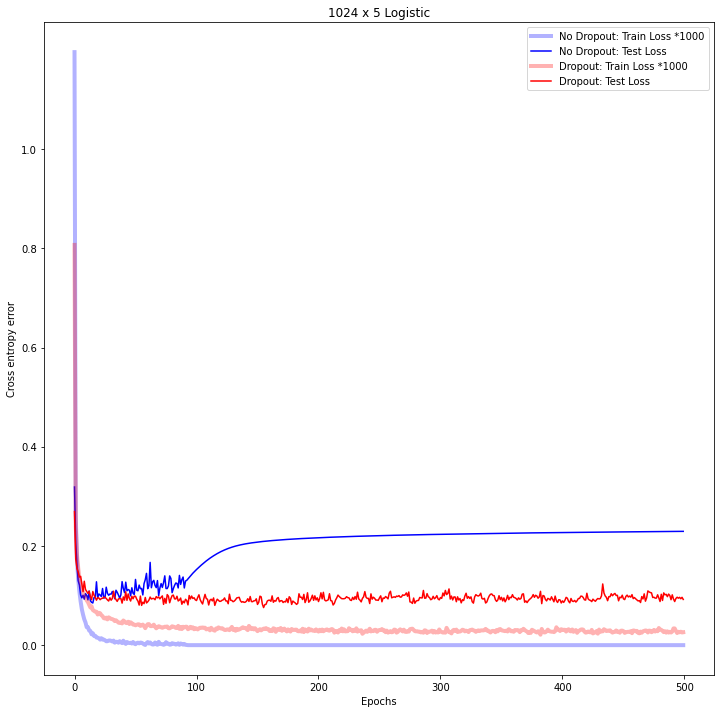

In [111]:
plt.plot(no_dropout_1_history.history['loss'],color='blue',linewidth=4.0,alpha=0.3)
plt.plot(no_dropout_1_history.history['val_loss'], color = 'blue')
plt.plot(dropout_model2_history.history['loss'],color='red',linewidth=4.0,alpha=0.3)
plt.plot(dropout_model2_history.history['val_loss'], color = 'red')

plt.legend(['No Dropout: Train Loss *1000','No Dropout: Test Loss','Dropout: Train Loss *1000','Dropout: Test Loss'])
plt.yticks(np.arange(0,1.2,0.2))
plt.xlabel('Epochs')
plt.ylabel('Cross entropy error')
plt.title('1024 x 5 Logistic')
plt.show()

After using the dropout layers, the model performs well on unseen data since the validation loss decreases as compared to without dropout layers.